## Exercise 2: Quantiles, IQR, Whiskers, Boxplot, Outliers
From the ECDF, we get a fairly good picture of the distribution of the data: A **quantile** adjusts the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile has $q$% of the mass below and $(1-q)$% of the mass above.

Write a Python class that:
- Computes the ECDF $\hat{F}_N(x)$
- Has a method to compute any quantile without using Numpy
- Has a method to compute the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Has a method to compute a five-number summary/boxplot: the whiskers, the minimum and maximum, the IQR and the median
- Compare your answers with `sns.boxplot`; making a boxplot yourself is kind of a pain, but you could make a 5-number summary visualization
- Anything outside the whiskers is an **outlier**; write a method that returns a Boolean vector indicating if the observations are outliers

Then use your ECDF class to analyze numeric variables from a dataset of your choice

In [3]:
#Get Data
def download_data(force=False):
    """Download and extract course data from Zenodo."""
    import urllib.request
    import zipfile
    import os
    
    zip_path = 'data.zip'
    data_dir = 'data'
    
    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/16954427/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")
    
    if not os.path.exists(data_dir):
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")
    
    return data_dir

download_data()


Download complete
Extracting data files...
Data extracted


'data'

[7.44601638e-04 1.48920328e-03 2.23380491e-03 ... 9.98510797e-01
 9.99255398e-01 1.00000000e+00]
21.93 96.29 51.01 69.8 61.129999999999995


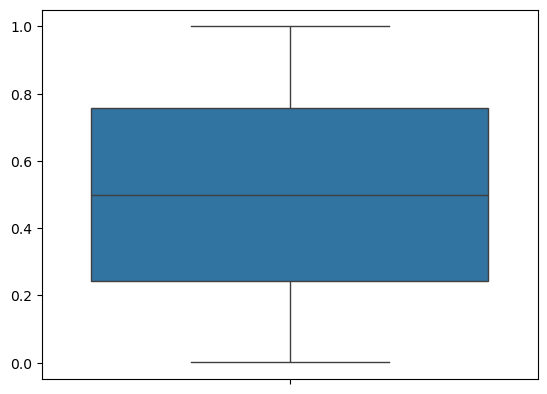

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class ECDFClass():
    def __init__(self, x):
        self.x = x
        self.z = np.sort(x.unique()) # Extract and sort unique values for x
        compare = x.to_numpy().reshape(-1,1) <= self.z.reshape(1,-1) # Compare x and Z values Broadcasting!!
    
        self.ecdf = np.mean(compare,axis=0) # Average over x indices for each z
    
    def get_ecdf(self):
        return self.ecdf
    def get_quantile(self, quantile):
        dist = (self.ecdf-quantile) ** 2 # Compute squared distance of F_hat from .5
        closest_indices = np.where( dist == dist.min() ) # Find the indices closest to 1/2
        q = np.mean(self.z[closest_indices])
        return q
    def print_ecdf(self):
        print(self.ecdf)
    def compare_answers(self):
        min = self.get_quantile(0)
        max = self.get_quantile(1)
        first_quartile = self.get_quantile(0.25)
        third_quartile = self.get_quantile(0.75)
        median = self.get_quantile(0.50)

        print(min, first_quartile, median, third_quartile, max)
        sns.boxplot(self.ecdf)
        

df = pd.read_csv('./data/metabric.csv') # Metabric Cancer Data
x = df['Age at Diagnosis']

myClass = ECDFClass(x)
myClass.print_ecdf()
# print(myClass.get_quantile(0.5))
myClass.compare_answers()


In [6]:
x.describe()

count    1343.000000
mean       60.598079
std        12.966330
min        21.930000
25%        51.045000
50%        61.140000
75%        69.815000
max        96.290000
Name: Age at Diagnosis, dtype: float64